# Tehran House Price prediction
### The Dataset has been extracted by the House_Web_Scraper.py script from ihome.ir

# Needed packages



In [ ]:
import pandas as pd
import re
import numpy as np
from termcolor import colored as cl
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Reading data

In [ ]:
Houses_df = pd.read_csv('Houses.csv')
Houses_df.head(20)

,Unnamed: 0,area,meters,years,rooms,elevator,storage_area,parking_space,floor,position,terrace,look,units_per_floor,floors,WC_num,master_num,WC_type,sell_value
0,0,تهران-اختیاریه,100.0,نوساز,2,1,1,1,3,شمالی،جنوبی,دارد,سنگ,3عدد,5طبقه,2عدد,1عدد,ایرانیفرنگی,6میلیاردو400میلیونتومان
1,1,تهران-اندرزگو,190.0,1,3,2,1,2,9,جنوبی,دارد,رومی,1عدد,10طبقه,3عدد,1عدد,ایرانیفرنگی,19میلیاردتومان
2,2,تهران-اندرزگو,180.0,12,3,2,1,1,4,جنوبی,دارد,رومی,1عدد,10طبقه,3عدد,1عدد,ایرانیفرنگی,14میلیاردتومان
3,3,تهران-خیابانقیطریه,112.0,15,2,0,1,1,2,شمالی,دارد,آجر,3عدد,4طبقه,2عدد,NaN,ایرانیفرنگی,6میلیاردو100میلیونتومان
4,4,تهران-اندرزگو,150.0,6,3,1,1,2,3,شمالی،جنوبی,دارد,سنگ,2عدد,5طبقه,3عدد,1عدد,ایرانیفرنگی,12میلیاردتومان
5,5,تهران-جماران,110.0,5,3,1,1,2,3,شمالی،جنوبی,دارد,سنگ,1عدد,5طبقه,2عدد,1عدد,ایرانیفرنگی,7میلیاردتومان
6,6,تهران-چیذر,87.0,30,2,0,1,1,1,شمالی،جنوبی,-,کنیتکس,3عدد,4طبقه,2عدد,NaN,ایرانیفرنگی,4میلیاردتومان
7,7,تهران-چیذر,87.0,30,2,0,1,1,1,شمالی،جنوبی,-,سیمان,3عدد,4طبقه,2عدد,NaN,ایرانیفرنگی,4میلیاردتومان
8,8,تهران-چیذر,87.0,30,2,0,1,1,1,شمالی،جنوبی,-,سنگ,3عدد,4طبقه,2عدد,NaN,ایرانیفرنگی,4میلیاردتومان
9,9,تهران-چیذر,87.0,30,2,0,1,1,1,شمالی،جنوبی,-,سیمان,3عدد,4طبقه,2عدد,NaN,ایرانیفرنگی,4میلیاردتومان


## Preprocessing 

In [ ]:
def price(p):
  x = re.findall('[0-9]+', p)
  if len(x) == 0: return 0
  if p.count('میلیارد')==1:
    milliard = x[0]
    if len(x) == 2:
      million = x[1]
    else: million = 0 
  else: 
    million = x[0]
    milliard = 0
  return float(milliard) + float(million)/1000

In [ ]:
Houses_df = Houses_df.drop(['Unnamed: 0'], axis = 1)
Houses_df = Houses_df.replace('نوساز',0)
Houses_df = Houses_df.replace('—','NaN')
Houses_df = Houses_df.replace('--','NaN')
Houses_df = Houses_df.replace('-','NaN')
Houses_df = Houses_df.replace('__','NaN')
Houses_df = Houses_df.replace({'NaN': np.nan})

Houses_df['area'] = Houses_df['area'].apply(lambda x: re.sub(r'تهران-','',x))
Houses_df[['meters','years','rooms','elevator','storage_area','parking_space','floor']] = Houses_df[['meters','years','rooms','elevator','storage_area','parking_space','floor']].astype(float)
Houses_df['units_per_floor'] = Houses_df['units_per_floor'].apply(lambda x: re.sub(r'عدد','',str(x))).astype(float)
Houses_df['WC_num'] = Houses_df['WC_num'].apply(lambda x: re.sub(r'عدد','',str(x))).astype(float)
Houses_df['master_num'] = Houses_df['master_num'].apply(lambda x: re.sub(r'عدد','',str(x))).astype(float)
Houses_df['floors'] = Houses_df['floors'].apply(lambda x: re.sub(r'طبقه','',str(x))).astype(float)
Houses_df['sell_value'] = Houses_df['sell_value'].apply(lambda x: price(x)).astype(float)

In [ ]:
Houses_df

,area,meters,years,rooms,elevator,storage_area,parking_space,floor,position,terrace,look,units_per_floor,floors,WC_num,master_num,WC_type,sell_value
0,اختیاریه,100.0,0.0,2.0,1.0,1.0,1.0,3.0,شمالی،جنوبی,دارد,سنگ,3.0,5.0,2.0,1.0,ایرانیفرنگی,6.40
1,اندرزگو,190.0,1.0,3.0,2.0,1.0,2.0,9.0,جنوبی,دارد,رومی,1.0,10.0,3.0,1.0,ایرانیفرنگی,19.00
2,اندرزگو,180.0,12.0,3.0,2.0,1.0,1.0,4.0,جنوبی,دارد,رومی,1.0,10.0,3.0,1.0,ایرانیفرنگی,14.00
3,خیابانقیطریه,112.0,15.0,2.0,0.0,1.0,1.0,2.0,شمالی,دارد,آجر,3.0,4.0,2.0,NaN,ایرانیفرنگی,6.10
4,اندرزگو,150.0,6.0,3.0,1.0,1.0,2.0,3.0,شمالی،جنوبی,دارد,سنگ,2.0,5.0,3.0,1.0,ایرانیفرنگی,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,ولنجک,300.0,9.0,3.0,1.0,1.0,1.0,12.0,شمالی,دارد,NaN,2.0,18.0,NaN,NaN,فرنگی,0.00
2816,مالکاشتر,62.0,20.0,2.0,0.0,1.0,1.0,1.0,جنوبی,دارد,NaN,4.0,4.0,NaN,NaN,ایرانی,1.55
2817,خیابانمیعاد,71.0,10.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2818,بشارت,72.0,15.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00


In [ ]:
Houses_df.describe()

,meters,years,rooms,elevator,storage_area,parking_space,floor,units_per_floor,floors,WC_num,master_num,sell_value
count,2820.000000,2820.000000,2820.000000,2614.000000,2595.000000,2632.000000,2787.000000,1854.000000,2073.000000,934.000000,515.000000,2820.000000
mean,117.592908,27.845745,2.132624,0.929227,0.905973,0.928951,3.298888,3.634844,5.683068,1.979657,1.234951,3.623480
std,103.150699,164.683070,0.851599,0.740783,0.319658,0.557494,2.809968,23.943604,3.013866,1.061159,0.876155,8.891323
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,68.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,0.000000
50%,96.000000,6.000000,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000,5.000000,2.000000,1.000000,0.998000
75%,134.250000,15.000000,3.000000,1.000000,1.000000,1.000000,4.000000,3.000000,6.000000,2.000000,1.000000,3.600000
max,2120.000000,1399.000000,15.000000,8.000000,5.000000,5.000000,30.000000,720.000000,30.000000,10.000000,5.000000,125.000000


In [ ]:
print(cl(Houses_df.dtypes, attrs = ['bold']))

area                object
meters             float64
years              float64
rooms              float64
elevator           float64
storage_area       float64
parking_space      float64
floor              float64
position            object
terrace             object
look                object
units_per_floor    float64
floors             float64
WC_num             float64
master_num         float64
WC_type             object
sell_value         float64
dtype: object


In [ ]:
Houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             2820 non-null   object 
 1   meters           2820 non-null   float64
 2   years            2820 non-null   float64
 3   rooms            2820 non-null   float64
 4   elevator         2614 non-null   float64
 5   storage_area     2595 non-null   float64
 6   parking_space    2632 non-null   float64
 7   floor            2787 non-null   float64
 8   position         1873 non-null   object 
 9   terrace          1725 non-null   object 
 10  look             1122 non-null   object 
 11  units_per_floor  1854 non-null   float64
 12  floors           2073 non-null   float64
 13  WC_num           934 non-null    float64
 14  master_num       515 non-null    float64
 15  WC_type          2124 non-null   object 
 16  sell_value       2820 non-null   float64
dtypes: float64(12)

# Plot Price distribution

In [ ]:
Houses_df['sell_value'].value_counts(0)

0.00     1074
1.40       24
1.75       24
4.00       20
1.00       20
         ... 
5.05        1
24.50       1
9.40        1
8.25        1
22.40       1
Name: sell_value, Length: 587, dtype: int64

In [ ]:
df = Houses_df[Houses_df.sell_value != 0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


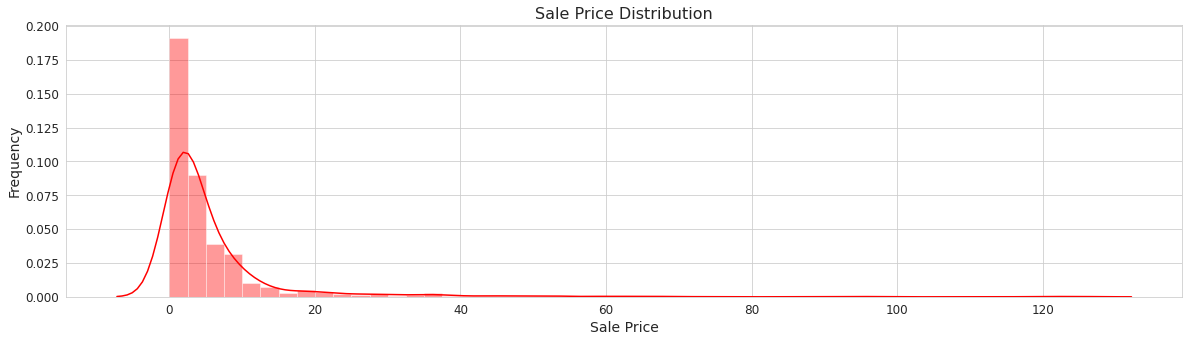

In [ ]:
sb.distplot(df['sell_value'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

sb.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)
plt.savefig('distplot_.png')
plt.show()

# Handle null values based on the task

In [ ]:
df["elevator"].fillna(0, inplace = True)
df["storage_area"].fillna(0, inplace = True)
df["parking_space"].fillna(0, inplace = True)
df["floor"].fillna(df['floor'].mode()[0], inplace = True)
df["position"].fillna(df['position'].mode()[0], inplace = True)
df["terrace"].fillna('ندارد', inplace = True)
df["look"].fillna(df['look'].mode()[0], inplace = True)
df["units_per_floor"].fillna(df['units_per_floor'].mode()[0], inplace = True)
df["floors"].fillna(df['floors'].mode()[0], inplace = True)
df["WC_num"].fillna(df['WC_num'].mode()[0], inplace = True)
df["master_num"].fillna(0, inplace = True)
df["WC_type"].fillna('ایرانی', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


# To see the impact of some features on the price

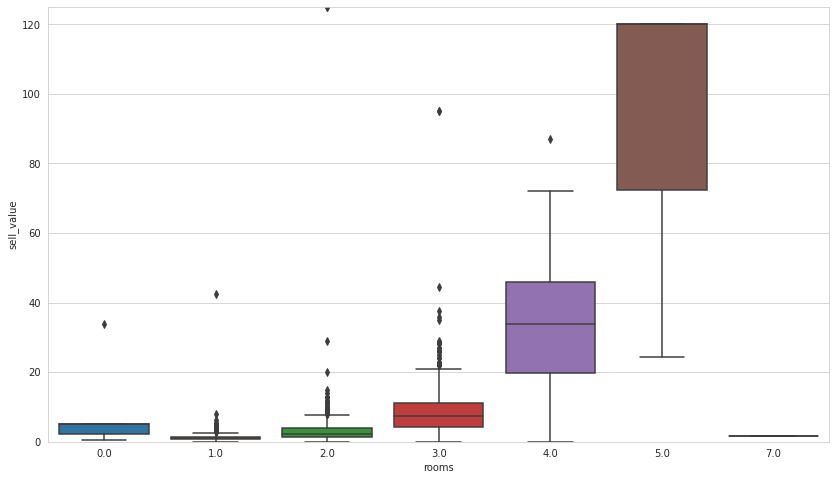

In [ ]:
var = 'rooms'
data = pd.concat([df['sell_value'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sb.boxplot(x=var, y="sell_value", data=data)
fig.axis(ymin=0, ymax=125);

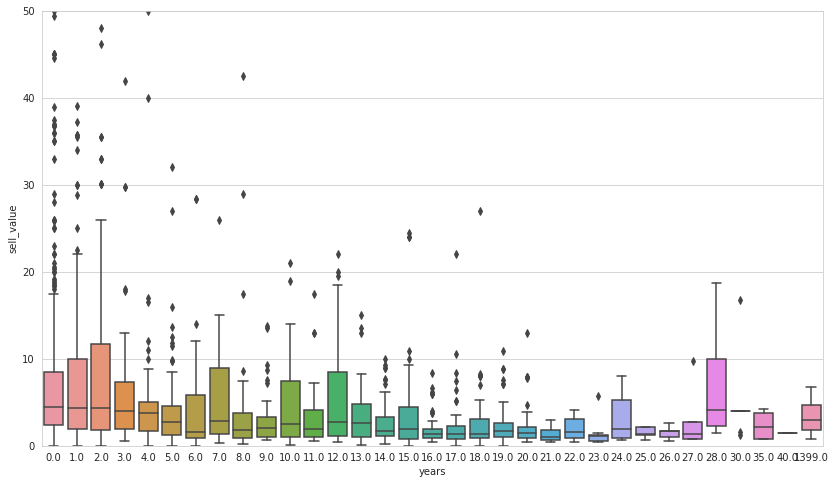

In [ ]:
var = 'years'
data = pd.concat([df['sell_value'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sb.boxplot(x=var, y="sell_value", data=data)
fig.axis(ymin=0, ymax=50);

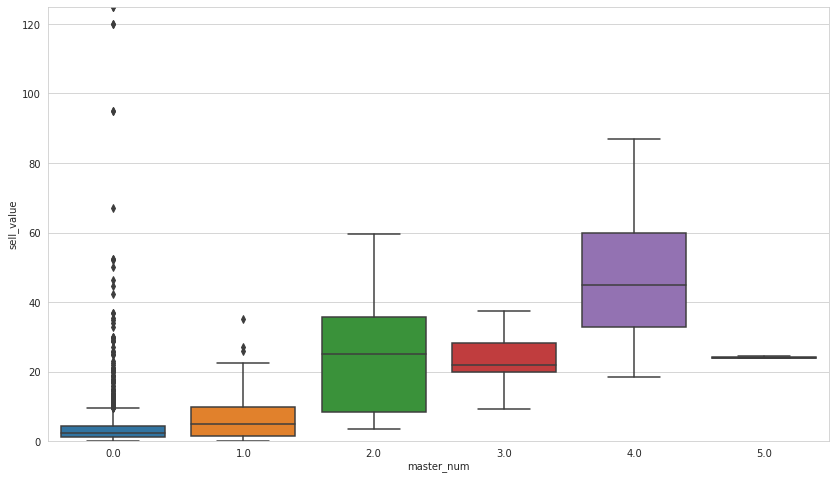

In [ ]:
var = 'master_num'
data = pd.concat([df['sell_value'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sb.boxplot(x=var, y="sell_value", data=data)
fig.axis(ymin=0, ymax=125);

# Correlation of features

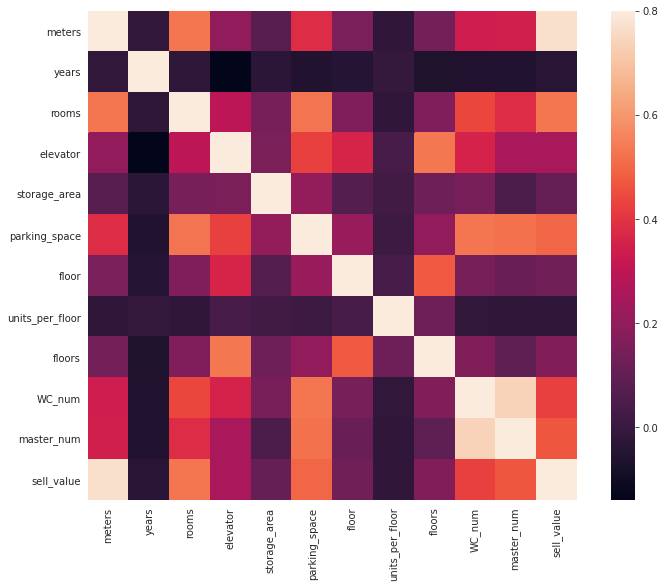

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True);

# Change str column to categorial type and encode them

In [ ]:
cat_columns = ["area","position","terrace","look","WC_type"]
for col in cat_columns:
    df[col] = df[col].astype('category').cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

,area,meters,years,rooms,elevator,storage_area,parking_space,floor,position,terrace,look,units_per_floor,floors,WC_num,master_num,WC_type,sell_value
0,14,100.0,0.0,2.0,1.0,1.0,1.0,3.0,6,0,5,3.0,5.0,2.0,1.0,1,6.4
1,46,190.0,1.0,3.0,2.0,1.0,2.0,9.0,0,0,3,1.0,10.0,3.0,1.0,1,19.0
2,46,180.0,12.0,3.0,2.0,1.0,1.0,4.0,0,0,3,1.0,10.0,3.0,1.0,1,14.0
3,144,112.0,15.0,2.0,0.0,1.0,1.0,2.0,5,0,0,3.0,4.0,2.0,0.0,1,6.1
4,46,150.0,6.0,3.0,1.0,1.0,2.0,3.0,6,0,5,2.0,5.0,3.0,1.0,1,12.0


# Data split to train and test

In [ ]:
X_var = df[['area','meters','years','rooms','elevator','storage_area','parking_space','floor','position','terrace','look','units_per_floor','floors','WC_num','master_num','WC_type']].values
y_var = df['sell_value'].values
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

# Predict price by linear regression

In [ ]:
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# predict  price by Ridge from sklearn

In [ ]:
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# Evaluate by MSE and R2 evaluation metrics for linear regression



In [ ]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, ols_yhat))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, ols_yhat))

Mean squared error: 37.44
Coefficient of determination: 0.60


# Evaluate by MSE and R2 evaluation metrics for linear regression


In [ ]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, ridge_yhat))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, ridge_yhat))

Mean squared error: 37.45
Coefficient of determination: 0.60
